In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('uber.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [6]:
df.dropna(inplace = True)

In [7]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [8]:
df

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...,...
199995,42598914,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00 UTC,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00 UTC,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00 UTC,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25 UTC,-73.997124,40.725452,-73.983215,40.695415,1


In [9]:
# Convert pickup_datetime to datetime format and extract day, hour, and minute
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['day'] = df['pickup_datetime'].dt.day
df['hour'] = df['pickup_datetime'].dt.hour
df['minute'] = df['pickup_datetime'].dt.minute

In [10]:
# drop unnecessary columns
df.drop(['key','pickup_datetime'], axis=1, inplace=True)

In [11]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,day,hour,minute
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,7,19,52
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,17,20,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,24,21,45
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,26,8,22
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,28,17,47


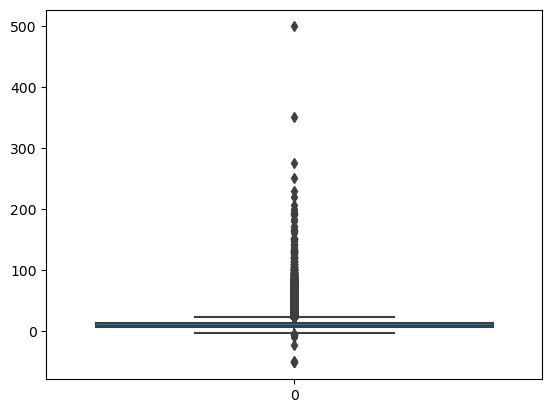

In [12]:
# identify the outliers
# visualize fare_amount to find potential outliers
sns.boxplot(df['fare_amount'])
plt.show()

In [13]:
# Removing outliers for fare_amount (assuming values above 100 are outliers for simplicity)
df = df[df['fare_amount'] <= 100]

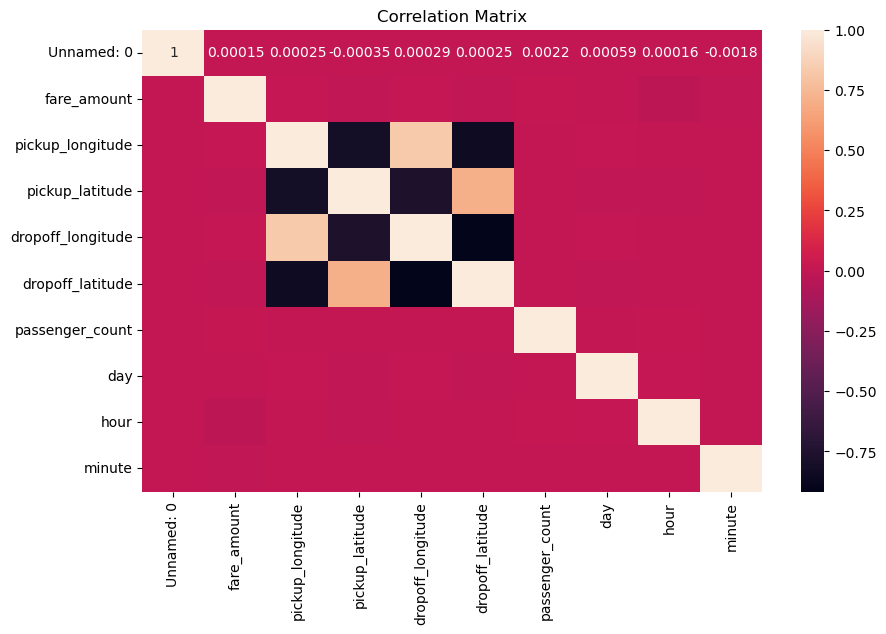

In [19]:
# check correlation
# we will use heatmap to check the correlation between features
# display correlation matrix
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

In [15]:
# Prepare the data for modeling
# Define features (X) and target (y)
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'day', 'hour', 'minute']]
y = df['fare_amount']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Implement Linear Regression and Random Forest Regression Models
# Linear Regression: A simple and interpretable model that tries to fit a straight line through the data.
# Random Forest: An ensemble model that creates multiple decision trees to improve prediction accuracy.

# Linear Regression model
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)  # Train the model
y_pred_lr = linear_regressor.predict(X_test)  # Make predictions on test set


# Random Forest Regression model
random_forest_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_regressor.fit(X_train, y_train)  # Train the model
y_pred_rf = random_forest_regressor.predict(X_test)  # Make predictions on test set

In [17]:
# Evaluate Models
# R² Score: Measures the proportion of variance in the target variable that the model explains.
# RMSE (Root Mean Squared Error): Tells us how far the predictions are from actual values on average.
# A higher R² and a lower RMSE indicate better performance.

# Evaluation for Linear Regression
r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

# Evaluation of Random Forest
r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))

# Print the results
print("Linear Regression - R2 Score:", r2_lr, ", RMSE:", rmse_lr)
print("Random Forest - R2 Score:", r2_rf, ", RMSE:", rmse_rf)

Linear Regression - R2 Score: 0.0003572125018413974 , RMSE: 9.457081881890469
Random Forest - R2 Score: 0.8018380219196442 , RMSE: 4.2106088141877915


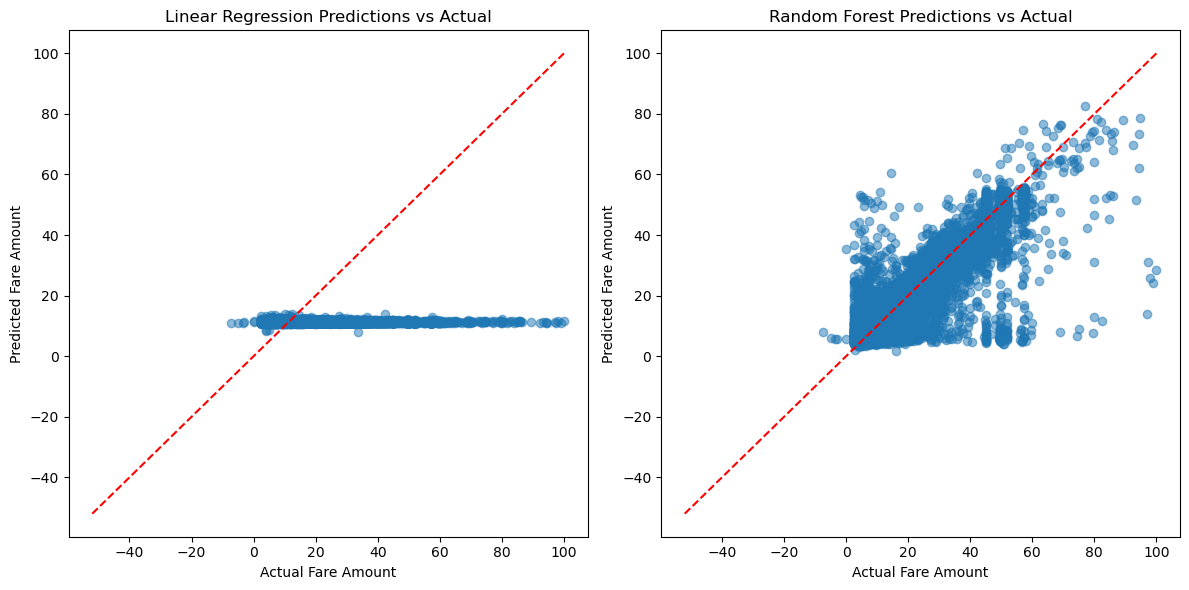

In [18]:
# Plotting the predictions vs actual values for Linear Regression
plt.figure(figsize=(12, 6))

# Linear Regression
plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title('Linear Regression Predictions vs Actual')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')

# Random Forest Regression
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_rf, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title('Random Forest Predictions vs Actual')
plt.xlabel('Actual Fare Amount')
plt.ylabel('Predicted Fare Amount')

plt.tight_layout()
plt.show()
